In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
  cd 'MyDrive/'

/content/gdrive/MyDrive


In [ ]:
ls

'Colab Notebooks'/    sub1.csv   sub3.csv   sub.csv        train_set.csv
 pneumonia_dataset/   sub2.csv   sub4.csv   test_set.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Dataset Preparation** 

In [ ]:
data1 = pd.read_csv("train_set.csv")
data1.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [ ]:
data1.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [ ]:
data2 = data1.copy()
data2 = data2.dropna()
#data2.head()

# **Feature Transformation**

# **Continuous Variable**

# **1. Salaries**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


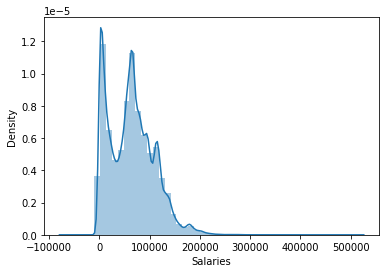

In [ ]:
sns.distplot(data2['Salaries'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


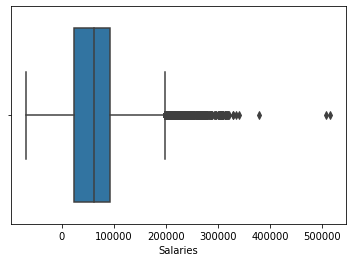

In [ ]:
sns.boxplot(data2['Salaries'])

In [ ]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.cbrt)
data2['Salaries'] = transformer.transform(data2['Salaries'])

In [ ]:
q1 = 28.609612
q3 = 45.307523
i = 0
a = q1-1*(q3-q1)
b = q3+1*(q3-q1)
j = 0
print(len(data2))
index1 = data2[(data2['Salaries'] <= a) | (data2['Salaries'] >= b)].index
print(len(index1))
#print(len(data2))
data2 = data2.drop(index1)
# while(i<len(data2['Salaries'])):
#   if(data2['Salaries'][i] > b or data2['Salaries'][i] < a):
#     data2.drop(data2.index[j])
#   else:
#     i+=1
#   j+=1

287798
14775


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


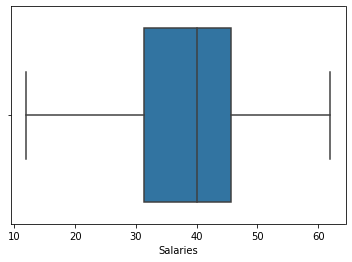

In [ ]:
sns.boxplot(data2['Salaries'])

# **2. OVERTIME**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


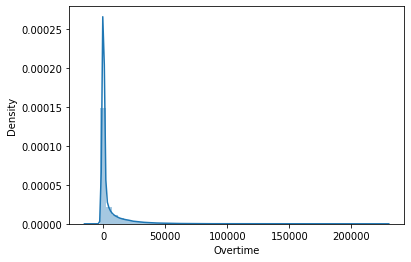

In [ ]:
sns.distplot(data2['Overtime'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


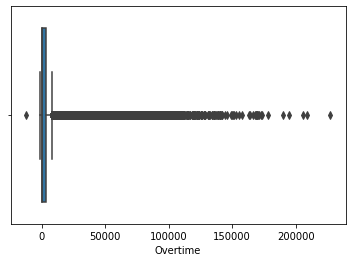

In [ ]:
sns.boxplot(data2['Overtime'])

In [ ]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.cbrt)
data2['Overtime'] = transformer.transform(data2['Overtime'])

In [ ]:
q1 = 0
q3 = 14.744564
i = 0
a = q1-1*(q3-q1)
b = q3+1*(q3-q1)
j = 0
print(len(data2))
index1 = data2[(data2['Overtime'] <= a) | (data2['Overtime'] >= b)].index
print(len(index1))
#print(len(data2))
data2 = data2.drop(index1)
# while(i<len(data2['Salaries'])):
#   if(data2['Salaries'][i] > b or data2['Salaries'][i] < a):
#     data2.drop(data2.index[j])
#   else:
#     i+=1
#   j+=1

273023
14366


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


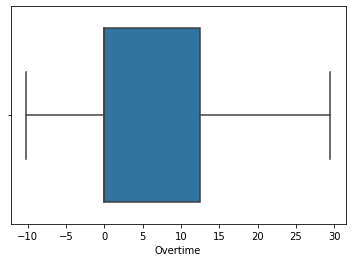

In [ ]:
sns.boxplot(data2['Overtime'])

# **3. H/D**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


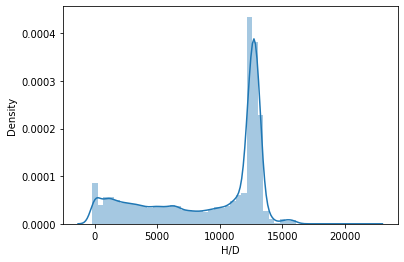

In [ ]:
sns.distplot(data2['H/D'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


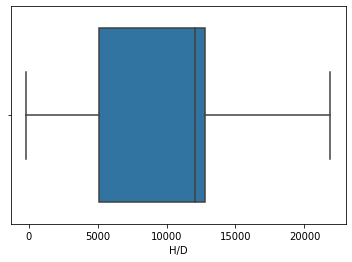

In [ ]:
sns.boxplot(data2['H/D'])

# **4. Training and Testing Split**

In [ ]:
X_train = data2.drop(['Total_Compensation'],axis = 1)[:250000]
X_test = data2.drop(['Total_Compensation'],axis = 1)[250000:]
y_train = data2['Total_Compensation'][:250000]
y_test = data2['Total_Compensation'][250000:]

# **Categorical Variable**

# **YEAR**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


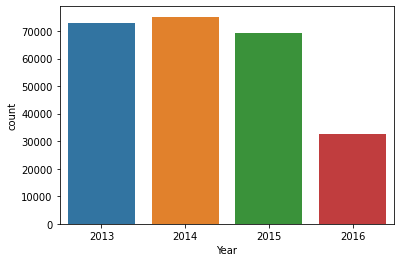

In [ ]:
sns.countplot(X_train['Year'])

In [ ]:
dict1 = {2013:[0,0] , 2014 :[0,0] , 2015 : [0,0] , 2016 : [0,0]}
indx1 = X_train.index
#print(indx1) 
for i in indx1:
  dict1[X_train["Year"][i]][0] = dict1[X_train["Year"][i]][0]+y_train[i]
  dict1[X_train["Year"][i]][1] = dict1[X_train["Year"][i]][1]+1
print(dict1)
for i in dict1:
  print(dict1[i][0]/dict1[i][1])

X_train['Year'] = X_train['Year'].replace(2014,1)
X_test['Year'] = X_test['Year'].replace(2014,1)
X_train['Year'] = X_train['Year'].replace(2015,2)
X_test['Year'] = X_test['Year'].replace(2015,2)
X_train['Year'] = X_train['Year'].replace(2013,3)
X_test['Year'] = X_test['Year'].replace(2013,3)
X_train['Year'] = X_train['Year'].replace(2016,4)
X_test['Year'] = X_test['Year'].replace(2016,4)

#2014 - 1
#2015 - 2
#2013 - 3
#2016 - 4

{2013: [7113715369, 73057], 2014: [7256386314, 75181], 2015: [6746379668, 69204], 2016: [3217164021, 32558]}
97372.1254499911
96518.88527686517
97485.40067048148
98813.31841636464


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


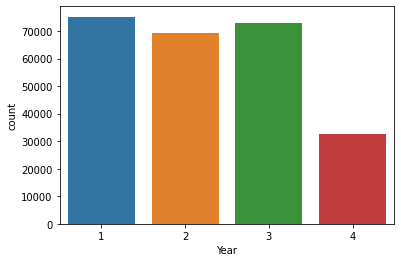

In [ ]:
sns.countplot(X_train['Year'])

# **OGC**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


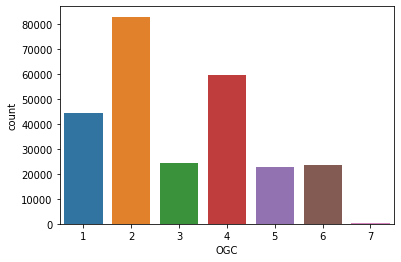

In [ ]:
sns.countplot(data2['OGC'])

In [ ]:
dict1 = {1:[0,0] , 2 :[0,0] , 3 : [0,0] , 4 : [0,0],5 : [0,0],6 : [0,0],7 : [0,0]}
indx1 = X_train.index
#print(indx1) 
for i in indx1:
  dict1[X_train["OGC"][i]][0] = dict1[X_train["OGC"][i]][0]+y_train[i]
  dict1[X_train["OGC"][i]][1] = dict1[X_train["OGC"][i]][1]+1
print(dict1)
for i in dict1:
  print(dict1[i][0]/dict1[i][1])

X_train['OGC'] = X_train['OGC'].replace(1,dict1[1][0]/dict1[1][1])
X_test['OGC'] = X_test['OGC'].replace(1,dict1[1][0]/dict1[1][1])
X_train['OGC'] = X_train['OGC'].replace(2,dict1[2][0]/dict1[2][1])
X_test['OGC'] = X_test['OGC'].replace(2,dict1[2][0]/dict1[2][1])
X_train['OGC'] = X_train['OGC'].replace(3,dict1[3][0]/dict1[3][1])
X_test['OGC'] = X_test['OGC'].replace(3,dict1[3][0]/dict1[3][1])
X_train['OGC'] = X_train['OGC'].replace(4,dict1[4][0]/dict1[4][1])
X_test['OGC'] = X_test['OGC'].replace(4,dict1[4][0]/dict1[4][1])
X_train['OGC'] = X_train['OGC'].replace(5,dict1[5][0]/dict1[5][1])
X_test['OGC'] = X_test['OGC'].replace(5,dict1[5][0]/dict1[5][1])
X_train['OGC'] = X_train['OGC'].replace(6,dict1[6][0]/dict1[6][1])
X_test['OGC'] = X_test['OGC'].replace(6,dict1[6][0]/dict1[6][1])
X_train['OGC'] = X_train['OGC'].replace(7,dict1[7][0]/dict1[7][1])
X_test['OGC'] = X_test['OGC'].replace(7,dict1[7][0]/dict1[7][1])


{1: [5565124982, 43102], 2: [7946575767, 80383], 3: [1706212342, 23706], 4: [5660115248, 57705], 5: [1228489076, 21975], 6: [2222690152, 22967], 7: [4437805, 162]}
129115.2378543919
98858.91005560878
71973.86071036868
98087.08513993588
55903.93974971559
96777.55701658902
27393.85802469136


# **OG**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


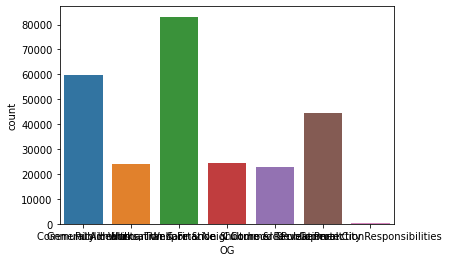

In [ ]:
sns.countplot(data2['OG'])

In [ ]:
dict1 = {}
indx1 = X_train.index
#print(indx1) 
for i in indx1:
  if X_train["OG"][i] in dict1:
    dict1[X_train["OG"][i]][0] = dict1[X_train["OG"][i]][0]+y_train[i]
    dict1[X_train["OG"][i]][1] = dict1[X_train["OG"][i]][1]+1
  else:
    dict1[X_train["OG"][i]] = [0,0]
    dict1[X_train["OG"][i]][0] = dict1[X_train["OG"][i]][0]+y_train[i]
    dict1[X_train["OG"][i]][1] = dict1[X_train["OG"][i]][1]+1
print(dict1)
for i in dict1:
  print(dict1[i][0]/dict1[i][1])
for i in dict1:
  X_train['OG'] = X_train['OG'].replace(i,dict1[i][0]/dict1[i][1])
  X_test['OG'] = X_test['OG'].replace(i,dict1[i][0]/dict1[i][1])

{'Community Health': [5658191142, 57687], 'General Administration & Finance': [2233205427, 23050], 'Public Works, Transportation & Commerce': [7955189038, 80438], 'Human Welfare & Neighborhood Development': [1695122309, 23628], 'Culture & Recreation': [1221522578, 21926], 'Public Protection': [5565980872, 43110], 'General City Responsibilities': [4434006, 161]}
98084.33688699361
96885.26798264642
98898.39426639151
71742.0987387845
55711.145580589255
129111.13133843656
27540.4099378882


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


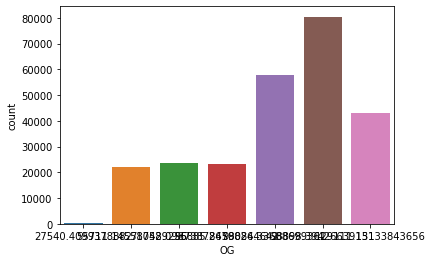

In [ ]:
sns.countplot(X_train['OG'])

# **DC**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


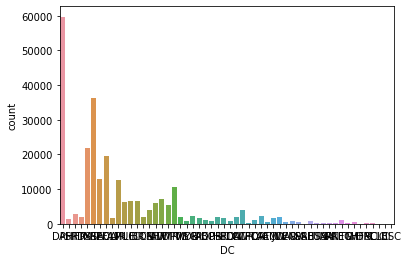

In [ ]:
sns.countplot(data2['DC'])

In [ ]:
len(data2['DC'].unique())

54

In [ ]:
data2['DC'].value_counts().head(5)

DPH    59745
MTA    36423
DSS    21960
POL    19538
REC    12989
Name: DC, dtype: int64

In [ ]:
idx1 = X_train.index
for i in idx1:
  if(X_train['DC'][i] == "DPH"):
    X_train['DC'][i] = 5
  elif(X_train['DC'][i] == "MTA"):
    X_train['DC'][i] = 4
  elif(X_train['DC'][i] == "DSS"):
    X_train['DC'][i] = 3
  elif(X_train['DC'][i] == "POL"):
    X_train['DC'][i] = 2
  elif(X_train['DC'][i] == "REC"):
    X_train['DC'][i] = 1
  else:
    X_train['DC'][i] = 0

idx1 = X_test.index
for i in idx1:
  if(X_test['DC'][i] == "DPH"):
    X_test['DC'][i] = 5
  elif(X_test['DC'][i] == "MTA"):
    X_test['DC'][i] = 4
  elif(X_test['DC'][i] == "DSS"):
    X_test['DC'][i] = 3
  elif(X_test['DC'][i] == "POL"):
    X_test['DC'][i] = 2
  elif(X_test['DC'][i] == "REC"):
    X_test['DC'][i] = 1
  else:
    X_test['DC'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: Sett

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


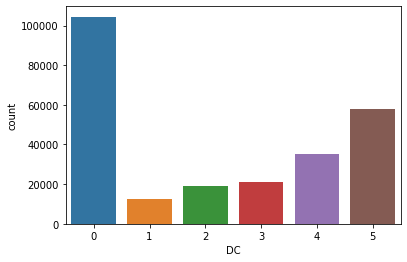

In [ ]:
sns.countplot(X_train['DC'])

# **DEPT**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


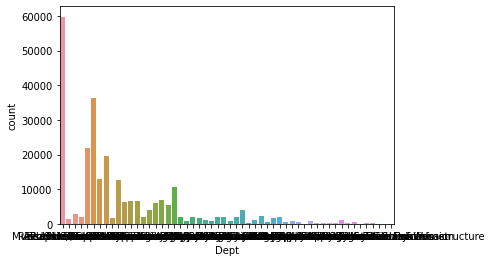

In [ ]:
sns.countplot(data2['Dept'])

In [ ]:
len(data2['Dept'].unique())

54

In [ ]:
data2['Dept'].value_counts().head(5)

Public Health                      59766
Municipal Transportation Agency    36405
Human Services                     21967
Police                             19548
Recreation and Park Commission     12984
Name: Dept, dtype: int64

In [ ]:
idx1 = X_train.index
for i in idx1:
  if(X_train['Dept'][i] == "Public Health"):
    X_train['Dept'][i] = 5
  elif(X_train['Dept'][i] == "Municipal Transportation Agency"):
    X_train['Dept'][i] = 4
  elif(X_train['Dept'][i] == "Human Services"):
    X_train['Dept'][i] = 3
  elif(X_train['Dept'][i] == "Police"):
    X_train['Dept'][i] = 2
  elif(X_train['Dept'][i] == "Recreation and Park Commission"):
    X_train['Dept'][i] = 1
  else:
    X_train['Dept'][i] = 0

idx1 = X_test.index
for i in idx1:
  if(X_test['Dept'][i] == "Public Health"):
    X_test['Dept'][i] = 5
  elif(X_test['Dept'][i] == "Municipal Transportation Agency"):
    X_test['Dept'][i] = 4
  elif(X_test['Dept'][i] == "Human Services"):
    X_test['Dept'][i] = 3
  elif(X_test['Dept'][i] == "Police"):
    X_test['Dept'][i] = 2
  elif(X_test['Dept'][i] == "Recreation and Park Commission"):
    X_test['Dept'][i] = 1
  else:
    X_test['Dept'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: Sett

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


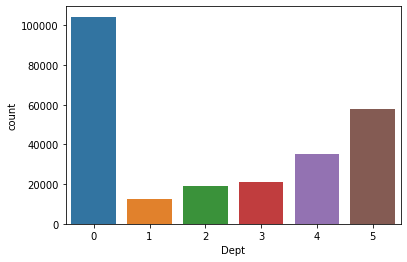

In [ ]:
sns.countplot(X_train['Dept'])

# **UC**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


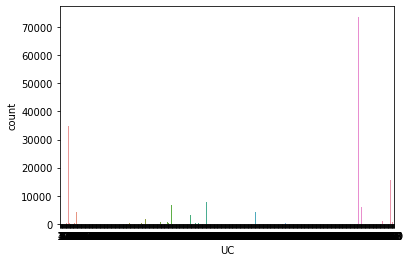

In [ ]:
sns.countplot(data2['UC'])

In [ ]:
len(data2['UC'].unique())

758

In [ ]:
data2['UC'].value_counts().head(5)

790    73751
21     34839
791    20310
911    15608
253    15436
Name: UC, dtype: int64

# **Union**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


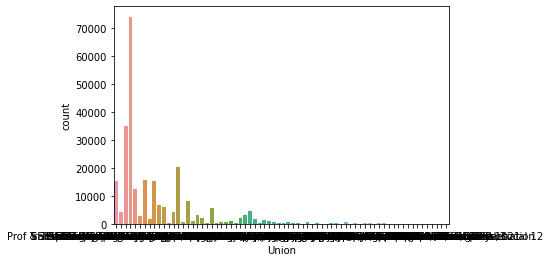

In [ ]:
sns.countplot(data2['Union'])

In [ ]:
data2['Union'].value_counts().head(5)

SEIU - Miscellaneous, Local 1021                   74184
Prof & Tech Engineers - Miscellaneous, Local 21    35128
SEIU - Staff and Per Diem Nurses, Local 1021       20471
Police Officers' Association                       15681
SEIU - Health Workers, Local 1021                  15467
Name: Union, dtype: int64

In [ ]:
idx1 = X_train.index
for i in idx1:
  if(X_train['Union'][i] == "SEIU - Miscellaneous, Local 1021"):
    X_train['Union'][i] = 5
  elif(X_train['Union'][i] == "Prof & Tech Engineers - Miscellaneous, Local 21"):
    X_train['Union'][i] = 4
  elif(X_train['Union'][i] == "SEIU - Staff and Per Diem Nurses, Local 1021"):
    X_train['Union'][i] = 3
  elif(X_train['Union'][i] == "Police Officers' Association"):
    X_train['Union'][i] = 2
  elif(X_train['Union'][i] == "SEIU - Health Workers, Local 1021"):
    X_train['Union'][i] = 1
  else:
    X_train['Union'][i] = 0

idx1 = X_test.index
for i in idx1:
  if(X_test['Union'][i] == "SEIU - Miscellaneous, Local 1021"):
    X_test['Union'][i] = 5
  elif(X_test['Union'][i] == "Prof & Tech Engineers - Miscellaneous, Local 21"):
    X_test['Union'][i] = 4
  elif(X_test['Union'][i] == "SEIU - Staff and Per Diem Nurses, Local 1021"):
    X_test['Union'][i] = 3
  elif(X_test['Union'][i] == "Police Officers' Association"):
    X_test['Union'][i] = 2
  elif(X_test['Union'][i] == "SEIU - Health Workers, Local 1021"):
    X_test['Union'][i] = 1
  else:
    X_test['Union'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


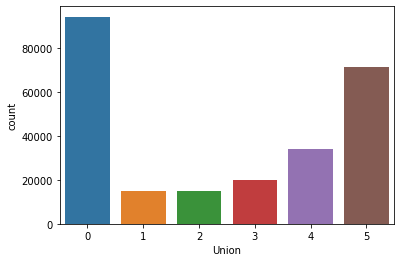

In [ ]:
sns.countplot(X_train['Union'])

In [ ]:
len(data2['Union'].unique())

70

# **JF**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


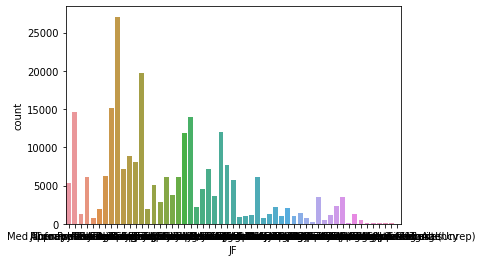

In [ ]:
sns.countplot(X_train['JF'])

In [ ]:
idx1 = X_train.index
for i in idx1:
  if(X_train['JF'][i] == "Nursing"):
    X_train['JF'][i] = 5
  elif(X_train['JF'][i] == "Street Transit"):
    X_train['JF'][i] = 4
  elif(X_train['JF'][i] == "Police Services"):
    X_train['JF'][i] = 3
  elif(X_train['JF'][i] == "Journeyman Trade"):
    X_train['JF'][i] = 2
  elif(X_train['JF'][i] == "Human Services"):
    X_train['JF'][i] = 1
  else:
    X_train['JF'][i] = 0

idx1 = X_test.index
for i in idx1:
  if(X_test['JF'][i] == "Nursing"):
    X_test['JF'][i] = 5
  elif(X_test['JF'][i] == "Street Transit"):
    X_test['JF'][i] = 4
  elif(X_test['JF'][i] == "Police Services"):
    X_test['JF'][i] = 3
  elif(X_test['JF'][i] == "Journeyman Trade"):
    X_test['JF'][i] = 2
  elif(X_test['JF'][i] == "Human Services"):
    X_test['JF'][i] = 1
  else:
    X_test['JF'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_laun

In [ ]:
data2['JF'].value_counts().head(5)

Nursing             28050
Street Transit      20427
Police Services     15676
Journeyman Trade    15128
Human Services      14482
Name: JF, dtype: int64

# **Job**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


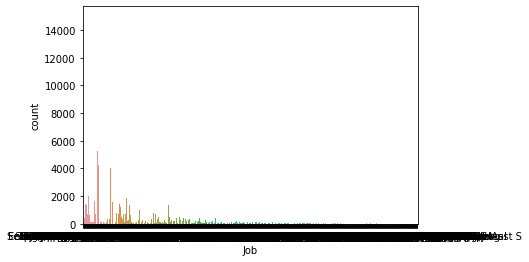

In [ ]:
sns.countplot(X_train['Job'])

In [ ]:
len(data2['Job'].unique())

1119

# **YT**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


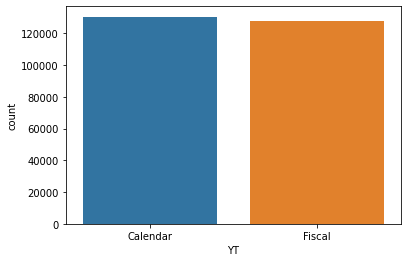

In [ ]:
sns.countplot(data2['YT'])

In [ ]:
#X_train['YT'] = data2['YT'][:250000]
#X_test['YT'] = data2['YT'][250000:]
X_train['YT'] = X_train['YT'].replace('Calendar',1)
X_train['YT'] = X_train['YT'].replace('Fiscal',0)
X_test['YT'] = X_test['YT'].replace('Calendar',1)
X_test['YT'] = X_test['YT'].replace('Fiscal',0)

In [ ]:
X_train = X_train.drop(['Job','UC'],axis = 1)
X_test = X_test.drop(['Job','UC'],axis = 1)

In [ ]:
X_train = X_train.drop(['OG'],axis = 1)
X_test = X_test.drop(['OG'],axis = 1)

# **6. Model Fitting and Cross Validation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
clf = LinearRegression()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(np.sqrt(mean_squared_error(y_test,clf.predict(X_test))))

0.9136187944921279
18151.503030195465


In [ ]:
from xgboost import XGBRegressor
clf = XGBRegressor()
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(np.sqrt(mean_squared_error(y_test,clf.predict(X_test))))

[16:39:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9867854378893024
7099.525941933707


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(np.sqrt(mean_squared_error(y_test,clf.predict(X_test))))

0.9808292092648175
8551.119496175066


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
clf = RandomForestRegressor()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(np.sqrt(mean_squared_error(y_test,clf.predict(X_test))))

0.989722148912379
6261.1502060193825


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
clf = RandomForestRegressor(n_estimators=226,min_samples_split=7,min_samples_leaf=6,max_depth=19)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(mean_absolute_error(y_test,clf.predict(X_test)))

0.9891199521237489
3067.4062725386416


In [ ]:
from lightgbm import LGBMRegressor
clf = LGBMRegressor()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(mean_absolute_error(y_test,clf.predict(X_test)))

0.9886904014615181
3333.256020836208


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(mean_absolute_error(y_test,clf.predict(X_test)))

0.6637244148566124
24357.81179007354


# **Training On Whole Data**

In [ ]:
X = data1.drop(['Total_Compensation'],axis = 1)
y = data1['Total_Compensation']

In [ ]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.cbrt)
X['Salaries'] = transformer.transform(X['Salaries'])

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.cbrt)
X['Overtime'] = transformer.transform(X['Overtime'])

X['Year'] = X['Year'].replace(2014,1)
X['Year'] = X['Year'].replace(2015,2)
X['Year'] = X['Year'].replace(2013,3)
X['Year'] = X['Year'].replace(2016,4)

X['OGC'] = X['OGC'].replace(1,129115.2378543919)
X['OGC'] = X['OGC'].replace(2,98858.91005560878)
X['OGC'] = X['OGC'].replace(3,71973.86071036868)
X['OGC'] = X['OGC'].replace(4,98087.08513993588)
X['OGC'] = X['OGC'].replace(5,55903.93974971559)
X['OGC'] = X['OGC'].replace(6,96777.55701658902)
X['OGC'] = X['OGC'].replace(7,27393.85802469136)

dict1 = {'Community Health': [5658191142, 57687], 'General Administration & Finance': [2233205427, 23050], 'Public Works, Transportation & Commerce': [7955189038, 80438], 'Human Welfare & Neighborhood Development': [1695122309, 23628], 'Culture & Recreation': [1221522578, 21926], 'Public Protection': [5565980872, 43110], 'General City Responsibilities': [4434006, 161]}
for i in dict1:
  X['OG'] = X['OG'].replace(i,dict1[i][0]/dict1[i][1])

idx1 = X.index
for i in idx1:
  if(X['DC'][i] == "DPH"):
    X['DC'][i] = 5
  elif(X['DC'][i] == "MTA"):
    X['DC'][i] = 4
  elif(X['DC'][i] == "DSS"):
    X['DC'][i] = 3
  elif(X['DC'][i] == "POL"):
    X['DC'][i] = 2
  elif(X['DC'][i] == "REC"):
    X['DC'][i] = 1
  else:
    X['DC'][i] = 0

idx1 = X.index
for i in idx1:
  if(X['Dept'][i] == "Public Health"):
    X['Dept'][i] = 5
  elif(X['Dept'][i] == "Municipal Transportation Agency"):
    X['Dept'][i] = 4
  elif(X['Dept'][i] == "Human Services"):
    X['Dept'][i] = 3
  elif(X['Dept'][i] == "Police"):
    X['Dept'][i] = 2
  elif(X['Dept'][i] == "Recreation and Park Commission"):
    X['Dept'][i] = 1
  else:
    X['Dept'][i] = 0

idx1 = X.index
for i in idx1:
  if(X['Union'][i] == "SEIU - Miscellaneous, Local 1021"):
    X['Union'][i] = 5
  elif(X['Union'][i] == "Prof & Tech Engineers - Miscellaneous, Local 21"):
    X['Union'][i] = 4
  elif(X['Union'][i] == "SEIU - Staff and Per Diem Nurses, Local 1021"):
    X['Union'][i] = 3
  elif(X['Union'][i] == "Police Officers' Association"):
    X['Union'][i] = 2
  elif(X['Union'][i] == "SEIU - Health Workers, Local 1021"):
    X['Union'][i] = 1
  else:
    X['Union'][i] = 0

idx1 = X.index
for i in idx1:
  if(X['JF'][i] == "Nursing"):
    X['JF'][i] = 5
  elif(X['JF'][i] == "Street Transit"):
    X['JF'][i] = 4
  elif(X['JF'][i] == "Police Services"):
    X['JF'][i] = 3
  elif(X['JF'][i] == "Journeyman Trade"):
    X['JF'][i] = 2
  elif(X['JF'][i] == "Human Services"):
    X['JF'][i] = 1
  else:
    X['JF'][i] = 0

X['YT'] = X['YT'].replace('Calendar',1)
X['YT'] = X['YT'].replace('Fiscal',0)
#y = np.cbrt(y)
idx = X.index
for i in idx:
  if(X['Salaries'][i]<0):
    X['Salaries'][i] = 0

for i in idx:
  if(X['Overtime'][i]<0):
    X['Overtime'][i] = 0

for i in idx:
  if(X['H/D'][i]<0):
    X['H/D'][i] = 0

X = X.drop(['Job','UC','OG'],axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=226,min_samples_split=7,min_samples_leaf=6,max_depth=19)
clf.fit(X,y)
print(clf.score(X_test,y_test))
print(mean_absolute_error(np.power(y_test,3),np.power(clf.predict(X_test),3)))

0.993047114837216
143296999895625.47


# **Prediction on Test Dataset**

In [ ]:
data4 = pd.read_csv("test_set.csv")
data4.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT
0,2016,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,790,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",Management Assistant,6161,74526,0,13068.800000,Fiscal
1,2013,3,Human Welfare & Neighborhood Development,DSS,Human Services,1,Miscellaneous Unrepresented Employees,Public Service Aide,Public Svc Aide-Public Works,17890,7219,0,3328.053046,Calendar
2,2016,2,"Public Works, Transportation & Commerce",PUC,PUC Public Utilities Commission,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Sub-Professional Engineering,"Stdntdsgntrain1, Arch/Eng/Plng",15092,4616,0,1147.260000,Fiscal
3,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Eligibility Worker,5144,6345,0,1433.600000,Calendar
4,2015,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Trans And Dist Line Worker,40128,105851,153,12242.440000,Calendar


In [ ]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.cbrt)
data4['Salaries'] = transformer.transform(data4['Salaries'])

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.cbrt)
data4['Overtime'] = transformer.transform(data4['Overtime'])

data4['Year'] = data4['Year'].replace(2014,1)
data4['Year'] = data4['Year'].replace(2015,2)
data4['Year'] = data4['Year'].replace(2013,3)
data4['Year'] = data4['Year'].replace(2016,4)

data4['OGC'] = data4['OGC'].replace(1,129115.2378543919)
data4['OGC'] = data4['OGC'].replace(2,98858.91005560878)
data4['OGC'] = data4['OGC'].replace(3,71973.86071036868)
data4['OGC'] = data4['OGC'].replace(4,98087.08513993588)
data4['OGC'] = data4['OGC'].replace(5,55903.93974971559)
data4['OGC'] = data4['OGC'].replace(6,96777.55701658902)
data4['OGC'] = data4['OGC'].replace(7,27393.85802469136)

dict1 = {'Community Health': [5658191142, 57687], 'General Administration & Finance': [2233205427, 23050], 'Public Works, Transportation & Commerce': [7955189038, 80438], 'Human Welfare & Neighborhood Development': [1695122309, 23628], 'Culture & Recreation': [1221522578, 21926], 'Public Protection': [5565980872, 43110], 'General City Responsibilities': [4434006, 161]}
for i in dict1:
  data4['OG'] = data4['OG'].replace(i,dict1[i][0]/dict1[i][1])

idx1 = data4.index
for i in idx1:
  if(data4['DC'][i] == "DPH"):
    data4['DC'][i] = 5
  elif(data4['DC'][i] == "MTA"):
    data4['DC'][i] = 4
  elif(data4['DC'][i] == "DSS"):
    data4['DC'][i] = 3
  elif(data4['DC'][i] == "POL"):
    data4['DC'][i] = 2
  elif(data4['DC'][i] == "REC"):
    data4['DC'][i] = 1
  else:
    data4['DC'][i] = 0

idx1 = data4.index
for i in idx1:
  if(data4['Dept'][i] == "Public Health"):
    data4['Dept'][i] = 5
  elif(data4['Dept'][i] == "Municipal Transportation Agency"):
    data4['Dept'][i] = 4
  elif(data4['Dept'][i] == "Human Services"):
    data4['Dept'][i] = 3
  elif(data4['Dept'][i] == "Police"):
    data4['Dept'][i] = 2
  elif(data4['Dept'][i] == "Recreation and Park Commission"):
    data4['Dept'][i] = 1
  else:
    data4['Dept'][i] = 0

idx1 = data4.index
for i in idx1:
  if(data4['Union'][i] == "SEIU - Miscellaneous, Local 1021"):
    data4['Union'][i] = 5
  elif(data4['Union'][i] == "Prof & Tech Engineers - Miscellaneous, Local 21"):
    data4['Union'][i] = 4
  elif(data4['Union'][i] == "SEIU - Staff and Per Diem Nurses, Local 1021"):
    data4['Union'][i] = 3
  elif(data4['Union'][i] == "Police Officers' Association"):
    data4['Union'][i] = 2
  elif(data4['Union'][i] == "SEIU - Health Workers, Local 1021"):
    data4['Union'][i] = 1
  else:
    data4['Union'][i] = 0

idx1 = data4.index
for i in idx1:
  if(data4['JF'][i] == "Nursing"):
    data4['JF'][i] = 5
  elif(data4['JF'][i] == "Street Transit"):
    data4['JF'][i] = 4
  elif(data4['JF'][i] == "Police Services"):
    data4['JF'][i] = 3
  elif(data4['JF'][i] == "Journeyman Trade"):
    data4['JF'][i] = 2
  elif(data4['JF'][i] == "Human Services"):
    data4['JF'][i] = 1
  else:
    data4['JF'][i] = 0

data4['YT'] = data4['YT'].replace('Calendar',1)
data4['YT'] = data4['YT'].replace('Fiscal',0)

data4 = data4.drop(['Job','UC','OG'],axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
lst1 = []
lst1 = clf.predict(np.array(data4))

In [ ]:
lst1

array([108315.98609231,  11324.91319336,   6398.66972109, ...,
        77233.41309661, 100159.39124913, 185019.73753453])

In [ ]:
lst1 = pd.DataFrame(lst1)
lst1.to_csv('submission.csv',index = False)